# Tweet temporal analysis

In [1]:
!pip install plotly

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_low_memory=False
import ipywidgets as widgets

In [3]:
colorPicker = widgets.ColorPicker(
concise = False,
description= 'Colore',
value ='black',
disabled = False,)
colorPicker

ColorPicker(value='black', description='Colore')

In [177]:
df_primo = pd.read_csv("../data_collection/data_biden/primo_semestre.csv", na_filter=True, na_values='[]',lineterminator='\n')
df_secondo = pd.read_csv("../data_collection/data_biden/secondo_semestre.csv", na_filter=True, na_values='[]',lineterminator='\n')
df_terzo = pd.read_csv("../data_collection/data_biden/terzo_semestre.csv", na_filter=True, na_values='[]',lineterminator='\n')
df_quarto = pd.read_csv("../data_collection/data_biden/quarto_semestre.csv", na_filter=True, na_values='[]', lineterminator='\n')
df_quinto = pd.read_csv("../data_collection/data_biden/quinto_semestre.csv", na_filter=True, na_values='[]',lineterminator='\n')

/Users/simonamazzarino/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: DtypeWarning: Columns (10,20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/simonamazzarino/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [178]:
joinDF = [df_primo, df_secondo, df_terzo, df_quarto, df_quinto]
df = pd.concat(joinDF)


In [179]:
del df["Unnamed: 0"]

In [180]:
df

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1218684471211245568,1218684471211245568,2020-01-18 23:59:54+00:00,2020-01-18,23:59:54,100,90497917,davidschor,David Schor (Biden=#BlueTrump) 💚,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1218684453494632449,1218663554250727424,2020-01-18 23:59:50+00:00,2020-01-18,23:59:50,100,175711368,trayntp,Biden is the More Effective Evil,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'number1fan_2', 'name': 'Davi...",NaN,NaN,NaN,NaN
2,1218683884994473984,1218678939947864064,2020-01-18 23:57:34+00:00,2020-01-18,23:57:34,100,967521853,badphotography_,Robby,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'WoobieTuesday', 'name': 'Woo...",NaN,NaN,NaN,NaN
3,1218683765674987525,1218683765674987520,2020-01-18 23:57:06+00:00,2020-01-18,23:57:06,100,1199496918029742083,glendowek42,Camigo Lordotic⚙️🐛,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1218683747417120768,1218683747417120768,2020-01-18 23:57:02+00:00,2020-01-18,23:57:02,100,543761210,mimitexasangel,Cannabis food is our Healthcare🍃🌿🌱🌳🍏,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123986,1479472860208844802,1479472860208844800,2022-01-07 15:19:51+00:00,2022-01-07,15:19:51,100,1062465110,johngililland,John Gililland,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123987,1479472457828478976,1479472457828478976,2022-01-07 15:18:15+00:00,2022-01-07,15:18:15,100,942241440855343104,ps9714,The Great War & Modern Memory,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123988,1479472401763258374,1479439038423597056,2022-01-07 15:18:02+00:00,2022-01-07,15:18:02,100,1267982563,howserob,Rob Howse,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'lettywho1', 'name': 'Dr Nazr...",NaN,NaN,NaN,NaN
123989,1479472233307328517,1479472233307328512,2022-01-07 15:17:22+00:00,2022-01-07,15:17:22,100,1414321685835177985,sheilachicago,Sheila,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [181]:
by_month = pd.to_datetime(df['date']).dt.to_period('M').value_counts().sort_index()
by_month.index = pd.PeriodIndex(by_month.index)
df_month = by_month.rename_axis('month').reset_index(name='tweets')
df_month

,month,tweets
0,2020-01,17932
1,2020-02,21706
2,2020-03,27277
3,2020-04,26176
4,2020-05,26916
5,2020-06,24529
6,2020-07,26492
7,2020-08,25516
8,2020-09,24172
9,2020-10,25959


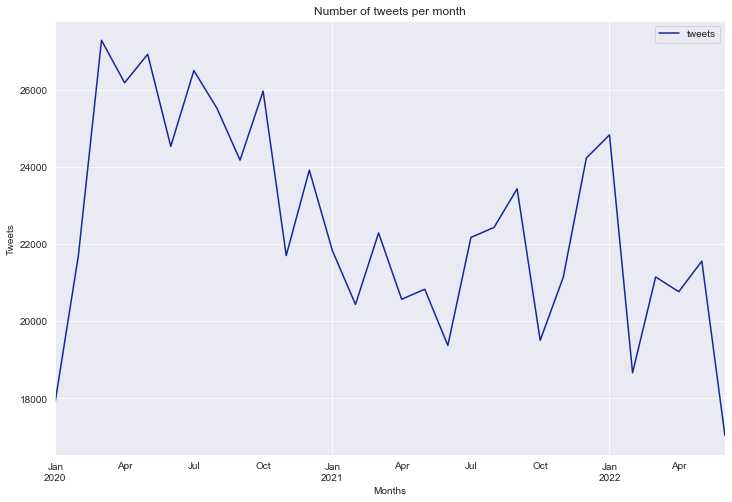

In [182]:
#plt.rcParams["figure.figsize"]=[12,8]
sns.set_style("darkgrid")
colors=['#15259d']
df_month.plot(x='month', y = 'tweets', color = colors)
plt.title("Number of tweets per month")
plt.xlabel("Months")
plt.ylabel("Tweets")
#plt.xticks(df_month.index,df_month['month'], rotation = 45)
plt.show()


Text(0.5, 1.0, 'Number of tweets per month')

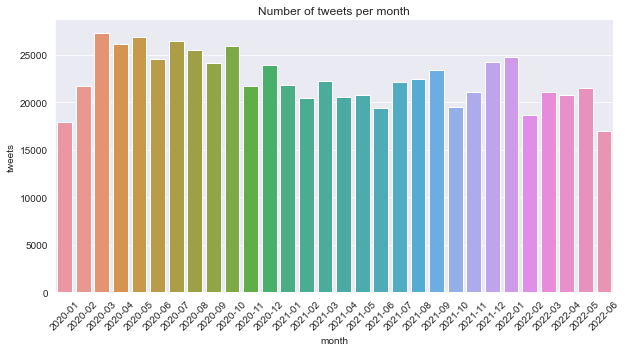

In [38]:
fig, ax = plt.subplots(figsize=(10,5))
sns.despine(right = True)
g= sns.barplot(x='month', y='tweets', data = df_month)
g.set_xticklabels(g.get_xticklabels(), rotation = 45)
g.set_title('Number of tweets per month')


In [39]:
import pandas as pd
import re
import gensim
from nltk.stem import WordNetLemmatizer

punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@'         # define a string of punctuation symbols

# Functions to clean tweets
def remove_links(tweet):
    """Takes a string and removes web links from it"""
    tweet = re.sub(r'http\S+', '', tweet)   # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet)  # remove bitly links
    tweet = tweet.strip('[link]')   # remove [links]
    tweet = re.sub(r'pic.twitter\S+','', tweet)
    return tweet

def remove_users(tweet):
    """Takes a string and removes retweet and @user information"""
   # tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet)  # remove re-tweet
    tweet = re.sub('(@)', '', tweet)  # remove tweeted at
    return tweet

def remove_hashtags(tweet):
    """Takes a string and removes any hash tags"""
    tweet = re.sub('(#)', ' ', tweet)  # remove hash tags
    return tweet

def remove_av(tweet):
    """Takes a string and removes AUDIO/VIDEO tags or labels"""
    tweet = re.sub('VIDEO:', '', tweet)  # remove 'VIDEO:' from start of tweet
    tweet = re.sub('AUDIO:', '', tweet)  # remove 'AUDIO:' from start of tweet
    return tweet

def tokenize(tweet):
    """Returns tokenized representation of words in lemma form excluding stopwords"""
    result = []
    for token in gensim.utils.simple_preprocess(tweet):
        if token not in gensim.parsing.preprocessing.STOPWORDS \
                and len(token) > 2:  # drops words with less than 3 characters
            result.append(lemmatize(token))
    return result

def lemmatize(token):
    """Returns lemmatization of a token"""
    return WordNetLemmatizer().lemmatize(token, pos='v')

def preprocess_tweet(tweet):
    """Main master function to clean tweets, stripping noisy characters, and tokenizing use lemmatization"""
    #tweet = remove_users(tweet)
    tweet = remove_links(tweet)
    #tweet = remove_hashtags(tweet)
    tweet = remove_av(tweet)
    tweet = tweet.lower()  # lower case
    tweet = re.sub('[' + punctuation + ']+', ' ', tweet)  # strip punctuation
    tweet = re.sub('\s+', ' ', tweet)  # remove double spacing
  # tweet = re.sub('([0-9]+)', '', tweet)  # remove numbers
    tweet_token_list = tokenize(tweet)  # apply lemmatization and tokenization
    tweet = ' '.join(tweet_token_list)
    tweet = re.sub(' amp ', '&', tweet)
    return tweet

def basic_clean(tweet):
    """Main master function to clean tweets only without tokenization or removal of stopwords"""
    # tweet = remove_users(tweet)
    # tweet = remove_hashtags(tweet)
    tweet = remove_av(tweet)
    tweet = tweet.lower()  # lower case
    tweet = re.sub('[' + punctuation + ']+', ' ', tweet)  # strip punctuation
    tweet = re.sub('\s+', ' ', tweet)  # remove double spacing
    tweet = re.sub('([0-9]+)', '', tweet)  # remove numbers
    tweet = re.sub(' & ', '', tweet)
    return tweet

def tokenize_tweets(df):
    df['tokens'] = df.tweet.apply(preprocess_tweet)
    num_tweets = len(df)
    print('Complete. Number of Tweets that have been cleaned and tokenized : {}'.format(num_tweets))
    return df

In [80]:
df = df.drop_duplicates()

In [81]:
df["tweet"] = df.tweet.astype("str")

In [82]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/simonamazzarino/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/simonamazzarino/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [83]:
df["preprocessed_tweet"] = df["tweet"].apply(preprocess_tweet)

In [84]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [85]:
analyser = SentimentIntensityAnalyzer()

In [86]:
pol = lambda x: analyser.polarity_scores(x)

In [87]:
df['compound'] = [analyser.polarity_scores(x)['compound'] for x in df['preprocessed_tweet']]
df['neg'] = [analyser.polarity_scores(x)['neg'] for x in df['preprocessed_tweet']]
df['neu'] = [analyser.polarity_scores(x)['neu'] for x in df['preprocessed_tweet']]
df['pos'] = [analyser.polarity_scores(x)['pos'] for x in df['preprocessed_tweet']]

In [88]:
df['sentiment_type']=''
df.loc[df.compound>=0.05,'sentiment_type']='POSITIVE'
df.loc[(df.compound > -0.05) & (df.compound < 0.05),'sentiment_type']='NEUTRAL'
df.loc[df.compound<= - 0.05,'sentiment_type']='NEGATIVE'

In [89]:
df.to_csv('sentiment.csv')

In [188]:
df = pd.read_csv("sentiment.csv", na_filter=True, na_values='[]',lineterminator='\n')

In [189]:
df

,Unnamed: 0,id,conversation_id,created_at,date,time,timezone,user_id,username,name,...,retweet_date,translate,trans_src,trans_dest,preprocessed_tweet,compound,neg,neu,pos,sentiment_type
0,0,1218684471211245568,1218684471211245568,2020-01-18 23:59:54+00:00,2020-01-18,23:59:54,100,90497917,davidschor,David Schor (Biden=#BlueTrump) 💚,...,NaN,NaN,NaN,NaN,joebiden accuse sanders campaign distort recor...,-0.5106,0.400,0.358,0.242,NEGATIVE
1,1,1218684453494632449,1218663554250727424,2020-01-18 23:59:50+00:00,2020-01-18,23:59:50,100,175711368,trayntp,Biden is the More Effective Evil,...,NaN,NaN,NaN,NaN,number fan bmarchetich videos joebiden talk cu...,0.1280,0.101,0.725,0.174,POSITIVE
2,2,1218683884994473984,1218678939947864064,2020-01-18 23:57:34+00:00,2020-01-18,23:57:34,100,967521853,badphotography_,Robby,...,NaN,NaN,NaN,NaN,woobietuesday heathergautney joebiden berniesa...,-0.6249,0.379,0.443,0.177,NEGATIVE
3,3,1218683765674987525,1218683765674987520,2020-01-18 23:57:06+00:00,2020-01-18,23:57:06,100,1199496918029742083,glendowek42,Camigo Lordotic⚙️🐛,...,NaN,NaN,NaN,NaN,democrats trump mentally unfit president deran...,-0.4404,0.168,0.733,0.099,NEGATIVE
4,4,1218683747417120768,1218683747417120768,2020-01-18 23:57:02+00:00,2020-01-18,23:57:02,100,543761210,mimitexasangel,Cannabis food is our Healthcare🍃🌿🌱🌳🍏,...,NaN,NaN,NaN,NaN,dnc need reign joebiden lie democratic voters ...,-0.3400,0.088,0.912,0.000,NEGATIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674489,123986,1479472860208844802,1479472860208844800,2022-01-07 15:19:51+00:00,2022-01-07,15:19:51,100,1062465110,johngililland,John Gililland,...,NaN,NaN,NaN,NaN,look like snl set resolute desk shrink years h...,0.2960,0.224,0.417,0.359,POSITIVE
674490,123987,1479472457828478976,1479472457828478976,2022-01-07 15:18:15+00:00,2022-01-07,15:18:15,100,942241440855343104,ps9714,The Great War & Modern Memory,...,NaN,NaN,NaN,NaN,miss president biden stun speech yesterday lin...,-0.1531,0.078,0.922,0.000,NEGATIVE
674491,123988,1479472401763258374,1479439038423597056,2022-01-07 15:18:02+00:00,2022-01-07,15:18:02,100,1267982563,howserob,Rob Howse,...,NaN,NaN,NaN,NaN,lettywho potus whitehouse statedept know rutit...,0.0516,0.000,0.926,0.074,POSITIVE
674492,123989,1479472233307328517,1479472233307328512,2022-01-07 15:17:22+00:00,2022-01-07,15:17:22,100,1414321685835177985,sheilachicago,Sheila,...,NaN,NaN,NaN,NaN,people critique biden perplex like like run of...,0.8996,0.000,0.536,0.464,POSITIVE


In [190]:
del df['Unnamed: 0']

In [191]:
df['date'] = pd.to_datetime(df['date']).dt.to_period('M')

In [192]:
df['date'].sort_index()

0         2020-01
1         2020-01
2         2020-01
3         2020-01
4         2020-01
           ...   
674489    2022-01
674490    2022-01
674491    2022-01
674492    2022-01
674493    2022-01
Name: date, Length: 674494, dtype: period[M]

In [193]:
df

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,retweet_date,translate,trans_src,trans_dest,preprocessed_tweet,compound,neg,neu,pos,sentiment_type
0,1218684471211245568,1218684471211245568,2020-01-18 23:59:54+00:00,2020-01,23:59:54,100,90497917,davidschor,David Schor (Biden=#BlueTrump) 💚,NaN,...,NaN,NaN,NaN,NaN,joebiden accuse sanders campaign distort recor...,-0.5106,0.400,0.358,0.242,NEGATIVE
1,1218684453494632449,1218663554250727424,2020-01-18 23:59:50+00:00,2020-01,23:59:50,100,175711368,trayntp,Biden is the More Effective Evil,NaN,...,NaN,NaN,NaN,NaN,number fan bmarchetich videos joebiden talk cu...,0.1280,0.101,0.725,0.174,POSITIVE
2,1218683884994473984,1218678939947864064,2020-01-18 23:57:34+00:00,2020-01,23:57:34,100,967521853,badphotography_,Robby,NaN,...,NaN,NaN,NaN,NaN,woobietuesday heathergautney joebiden berniesa...,-0.6249,0.379,0.443,0.177,NEGATIVE
3,1218683765674987525,1218683765674987520,2020-01-18 23:57:06+00:00,2020-01,23:57:06,100,1199496918029742083,glendowek42,Camigo Lordotic⚙️🐛,NaN,...,NaN,NaN,NaN,NaN,democrats trump mentally unfit president deran...,-0.4404,0.168,0.733,0.099,NEGATIVE
4,1218683747417120768,1218683747417120768,2020-01-18 23:57:02+00:00,2020-01,23:57:02,100,543761210,mimitexasangel,Cannabis food is our Healthcare🍃🌿🌱🌳🍏,NaN,...,NaN,NaN,NaN,NaN,dnc need reign joebiden lie democratic voters ...,-0.3400,0.088,0.912,0.000,NEGATIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674489,1479472860208844802,1479472860208844800,2022-01-07 15:19:51+00:00,2022-01,15:19:51,100,1062465110,johngililland,John Gililland,NaN,...,NaN,NaN,NaN,NaN,look like snl set resolute desk shrink years h...,0.2960,0.224,0.417,0.359,POSITIVE
674490,1479472457828478976,1479472457828478976,2022-01-07 15:18:15+00:00,2022-01,15:18:15,100,942241440855343104,ps9714,The Great War & Modern Memory,NaN,...,NaN,NaN,NaN,NaN,miss president biden stun speech yesterday lin...,-0.1531,0.078,0.922,0.000,NEGATIVE
674491,1479472401763258374,1479439038423597056,2022-01-07 15:18:02+00:00,2022-01,15:18:02,100,1267982563,howserob,Rob Howse,NaN,...,NaN,NaN,NaN,NaN,lettywho potus whitehouse statedept know rutit...,0.0516,0.000,0.926,0.074,POSITIVE
674492,1479472233307328517,1479472233307328512,2022-01-07 15:17:22+00:00,2022-01,15:17:22,100,1414321685835177985,sheilachicago,Sheila,NaN,...,NaN,NaN,NaN,NaN,people critique biden perplex like like run of...,0.8996,0.000,0.536,0.464,POSITIVE


In [194]:
df["date"] = df.date.astype("str")

In [195]:
sents = pd.crosstab(df['date'], df['sentiment_type'])

In [196]:
sents

sentiment_type,NEGATIVE,NEUTRAL,POSITIVE
date,,,
2020-01,6483,4115,7334
2020-02,6357,5174,10175
2020-03,9105,5925,12247
2020-04,9455,5446,11275
2020-05,10185,6198,10533
2020-06,8521,5934,10074
2020-07,8758,6664,11070
2020-08,9022,5871,10623
2020-09,8687,5702,9783


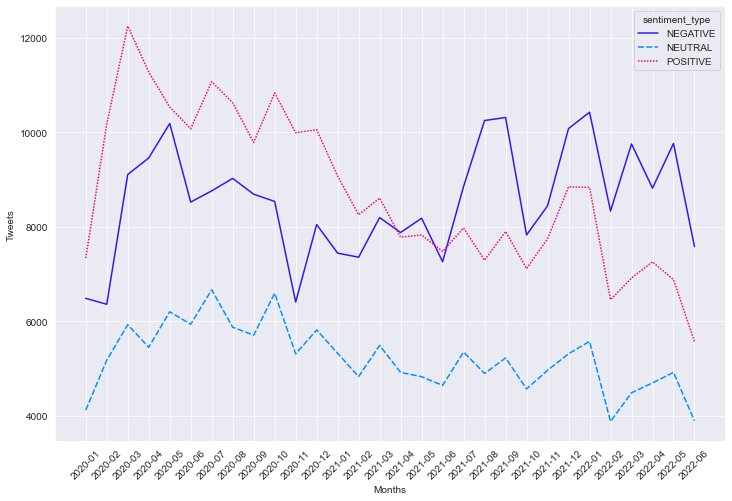

In [219]:
colors = ['#3118ec','#0091ff','#ff006f']
sns.set_style("darkgrid")
sns.lineplot(data=sents, palette = colors)
#plt.title("Sentiment Trend per month")
plt.xlabel("Months")
plt.ylabel("Tweets")
plt.xticks(rotation = 45)
plt.show()